In [201]:
#Import Libraries #

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import seaborn as sns
plt.style.use("ggplot")

In [202]:
#Load Dataset
df = pd.read_csv("Resume.csv")

Data Cleaning & Preprocessing

In [203]:
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [204]:
df.size

9936

In [205]:
df.shape

(2484, 4)

In [206]:
df = df.rename(columns={"Resume_str": "Resume"}, errors="raise")
df = df.drop(["ID","Resume_html"],axis=1)

In [207]:
df.head()

,Resume,Category
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR
1,"HR SPECIALIST, US HR OPERATIONS ...",HR
2,HR DIRECTOR Summary Over 2...,HR
3,HR SPECIALIST Summary Dedica...,HR
4,HR MANAGER Skill Highlights ...,HR


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resume    2484 non-null   object
 1   Category  2484 non-null   object
dtypes: object(2)
memory usage: 38.9+ KB


In [209]:
df.isna().sum()

Resume      0
Category    0
dtype: int64

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15808\1522476100.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Category" , palette="Set3", data=df ,order= df["Category"].value_counts().index)


<Axes: xlabel='count', ylabel='Category'>

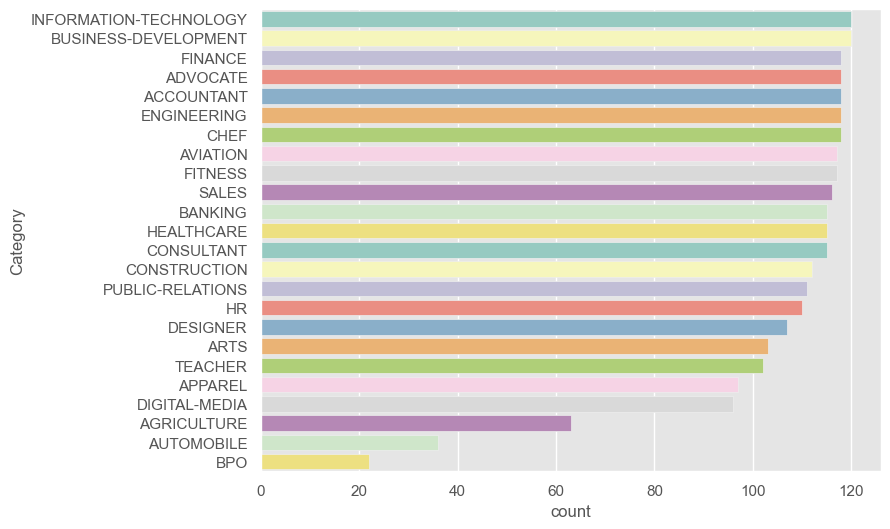

In [210]:
plt.figure(figsize=(8,6))
sns.countplot(y="Category" , palette="Set3", data=df ,order= df["Category"].value_counts().index)

In [211]:
df["Category"].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [212]:
# Drop outliers

outlier_categories = ['AGRICULTURE', 'AUTOMOBILE', 'BPO']

df = df[~df['Category'].isin(outlier_categories)].reset_index(drop=True)

In [213]:
df.shape

(2363, 2)

In [214]:
print(df["Resume"][1])

         HR SPECIALIST, US HR OPERATIONS       Summary     Versatile  media professional with background in Communications, Marketing, Human Resources and Technology.         Experience     09/2015   to   Current     HR Specialist, US HR Operations    Company Name   －   City  ,   State       Managed communication regarding launch of Operations group, policy changes and system outages      Designed standard work and job aids to create comprehensive training program for new employees and contractors         Audited job postings for old, pending, on-hold and draft positions.           Audited union hourly, non-union hourly and salary background checks and drug screens             Conducted monthly new hire benefits briefing to new employees across all business units               Served as a link between HR Managers and vendors by handling questions and resolving system-related issues         Provide real-time process improvement feedback on key metrics and initiatives  Successfully re-br

In [215]:
# Function to clean resume text by removing punctuation, non-ASCII characters, numbers, extra whitespace, and converting to lowercase

import re 

def clean_data(text):


    text = text.lower()    
    text = re.sub(r"\n"," ",text)
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = re.sub(r"\s+"," ",text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) 
    text = re.sub(r'[^\x00-\x7f]', r' ', text)  # non-ascii
    text = re.sub(r'\s+', ' ', text)
    return text.strip()





<>:12: SyntaxWarning: invalid escape sequence '\]'
<>:12: SyntaxWarning: invalid escape sequence '\]'
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15808\1013756827.py:12: SyntaxWarning: invalid escape sequence '\]'
  text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text)


In [216]:
df["Cleaned_Resume"] = df["Resume"].apply(lambda x: clean_data(x))
len(df["Cleaned_Resume"][1])

4948

In [217]:
df.head()

,Resume,Category,Cleaned_Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administratormarketing associate hr adminis...
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in r...
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dyn...
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...


In [218]:
import textwrap
text = df["Cleaned_Resume"].iloc[1]
print(textwrap.fill(text, width=450))

hr specialist us hr operations summary versatile media professional with background in communications marketing human resources and technology experience to current hr specialist us hr operations company name city state managed communication regarding launch of operations group policy changes and system outages designed standard work and job aids to create comprehensive training program for new employees and contractors audited job postings for
old pending onhold and draft positions audited union hourly nonunion hourly and salary background checks and drug screens conducted monthly new hire benefits briefing to new employees across all business units served as a link between hr managers and vendors by handling questions and resolving systemrelated issues provide realtime process improvement feedback on key metrics and initiatives successfully rebranded us hr operations sharepoint site
business unit project manager for rfirfp on background check and drug screen vendor to it marketing an

Featuren Engineering

In [165]:
df["char_count"] = df["Cleaned_Resume"].apply(len)

df["word_count"] = df["Cleaned_Resume"].apply(lambda x: len(x.split()))

In [ ]:
# Extracting important keywords

keywords = [
    # IT
    "python", "java", "sql", "software", "developer", "network", "security", "cloud", "linux", "database",

    # Business Development
    "client", "partnership", "strategy", "growth", "lead", "negotiation",

    # Finance / Accounting
    "finance", "accounting", "budget", "audit", "tax", "ledger", "compliance",

    # Legal / Advocate
    "legal", "law", "court", "case", "contract", "litigation", "attorney",

    # Engineering
    "engineer", "design", "mechanical", "electrical", "cad", "manufacturing",

    # Healthcare
    "medical", "patient", "clinic", "treatment", "doctor", "nurse",

    # Aviation
    "aviation", "aircraft", "flight", "pilot", "airline",

    # Sales / Marketing
    "sales", "marketing", "campaign", "target", "branding", "promotion", "product",

    # HR
    "hr", "hiring", "recruitment", "employee", "training", "payroll",

    # Teaching / Education
    "teaching", "lesson", "student", "classroom", "curriculum", "instructor",

    # Design / Arts / Media
    "design", "photoshop", "illustrator", "creative", "branding", "content", "media", "video", "graphic",

    # Construction
    "construction", "blueprint", "contractor", "project", "site", "safety",

    # Apparel / Fashion
    "fashion", "textile", "apparel", "style", "garment", "fabric",

    # Food / Chef
    "chef", "cooking", "kitchen", "menu", "cuisine", "restaurant",

    # Banking
    "banking", "loan", "credit", "transaction", "deposit", "branch",

    # Consultant
    "consulting", "advisor", "analysis", "report", "client", "solution",

    # Fitness
    "fitness", "exercise", "coach", "gym", "health", "workout",


    # Public Relations
    "public", "media", "communication", "press", "relations", "event"
]

In [167]:
for word in keywords:
    df[f"count_{word}"] = df["Cleaned_Resume"].apply(lambda x : x.lower().split().count(word) )

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15808\509860590.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"count_{word}"] = df["Cleaned_Resume"].apply(lambda x : x.lower().split().count(word) )
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15808\509860590.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"count_{word}"] = df["Cleaned_Resume"].apply(lambda x : x.lower().split().count(word) )
C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_15808\509860590.py:2: PerformanceWarning: DataFrame is highly fragmented.

In [168]:
df.head()

,Resume,Category,Cleaned_Resume,char_count,word_count,count_python,count_java,count_sql,count_software,count_developer,...,count_exercise,count_coach,count_gym,count_health,count_workout,count_public,count_communication,count_press,count_relations,count_event
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,HR,hr administratormarketing associate hr adminis...,4767,630,0,0,0,0,0,...,0,0,0,1,0,2,0,0,8,0
1,"HR SPECIALIST, US HR OPERATIONS ...",HR,hr specialist us hr operations summary versati...,4948,673,0,0,0,1,0,...,0,0,0,0,0,1,5,0,1,1
2,HR DIRECTOR Summary Over 2...,HR,hr director summary over years experience in r...,7026,986,0,0,0,0,0,...,0,0,0,3,0,2,0,0,2,0
3,HR SPECIALIST Summary Dedica...,HR,hr specialist summary dedicated driven and dyn...,2545,361,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,HR MANAGER Skill Highlights ...,HR,hr manager skill highlights hr skills hr depar...,8509,1170,0,0,0,0,0,...,0,2,0,4,0,0,0,0,5,0


In [169]:
x = df.iloc[:,2:]

labels = df["Category"]

In [170]:
x.head()

,Cleaned_Resume,char_count,word_count,count_python,count_java,count_sql,count_software,count_developer,count_network,count_security,...,count_exercise,count_coach,count_gym,count_health,count_workout,count_public,count_communication,count_press,count_relations,count_event
0,hr administratormarketing associate hr adminis...,4767,630,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,0,8,0
1,hr specialist us hr operations summary versati...,4948,673,0,0,0,1,0,0,0,...,0,0,0,0,0,1,5,0,1,1
2,hr director summary over years experience in r...,7026,986,0,0,0,0,0,0,2,...,0,0,0,3,0,2,0,0,2,0
3,hr specialist summary dedicated driven and dyn...,2545,361,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,hr manager skill highlights hr skills hr depar...,8509,1170,0,0,0,0,0,0,0,...,0,2,0,4,0,0,0,0,5,0


In [171]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, labels, test_size=0.2, random_state=42)

In [172]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1890, 116)
(1890,)
(473, 116)
(473,)


In [173]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# Preprocessing pipeline to clean and prepare data before training

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.compose import ColumnTransformer


df_num = df.select_dtypes(include= ["float64","int64"]).columns.tolist()




vectorizer_pipline  = make_pipeline(
    
    TfidfVectorizer(max_features=3000,ngram_range=(1,2),stop_words='english'),
    SelectKBest(chi2, k=2000)
)

num_pipeline = make_pipeline(

    SimpleImputer(strategy="mean"),
    MaxAbsScaler()  
)

preprocessing = ColumnTransformer([

    ("num_data", num_pipeline , df_num),
    ("cat_data" , vectorizer_pipline , "Cleaned_Resume"),

])




Model training


In [175]:
from sklearn.svm import LinearSVC 


model_pipeline =  make_pipeline(
    preprocessing,
    LinearSVC(C= 1 , penalty="l2" , max_iter= 5000 ,loss="squared_hinge", random_state= 42 )
)

model_pipeline.fit(x_train,y_train)


,steps,"[('columntransformer', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_data', ...), ('cat_data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [176]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(model_pipeline,x_train,y_train,cv=3)

In [177]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_train , y_train_predict)


<Figure size 2000x2000 with 0 Axes>

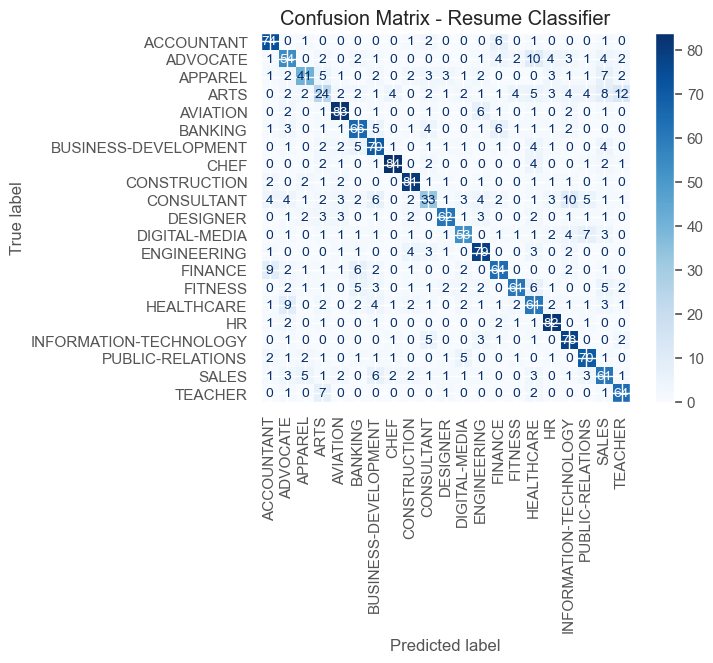

In [178]:
## Visualize confusion matrix to evaluate classification performance
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=le.classes_)
plt.figure(figsize=(20,20))
disp.plot(cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix - Resume Classifier")
plt.show()


In [179]:
# Evaluate model performance using accuracy, precision, recall, and F1-score
from sklearn.metrics import classification_report

print(classification_report(y_train,y_train_predict,target_names=le.classes_))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.86      0.80        86
              ADVOCATE       0.59      0.59      0.59        91
               APPAREL       0.71      0.53      0.61        77
                  ARTS       0.41      0.29      0.34        84
              AVIATION       0.81      0.84      0.82        99
               BANKING       0.71      0.70      0.71        94
  BUSINESS-DEVELOPMENT       0.66      0.74      0.70        94
                  CHEF       0.89      0.86      0.88        98
          CONSTRUCTION       0.81      0.85      0.83        95
            CONSULTANT       0.55      0.38      0.45        88
              DESIGNER       0.82      0.75      0.78        83
         DIGITAL-MEDIA       0.73      0.67      0.70        79
           ENGINEERING       0.75      0.83      0.79        95
               FINANCE       0.71      0.70      0.70        92
               FITNESS       0.84      

In [180]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_predict,average="micro")

0.7116402116402116

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint ,uniform

svc_pipeline =  make_pipeline(
    preprocessing,
    LinearSVC( penalty="l2" ,loss="squared_hinge", random_state= 42 )
)



param_svc = {

    "linearsvc__C":uniform(0.01,100),
    "linearsvc__dual":[True,False],
    "linearsvc__max_iter": randint(3000,10000)
}

random_search = RandomizedSearchCV(estimator=svc_pipeline, param_distributions=param_svc, n_iter=40, scoring='f1_macro',cv=5,random_state=42, n_jobs=-1,)

random_search.fit(x_train,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'linearsvc__C': <scipy.stats....00259C05F70E0>, 'linearsvc__dual': [True, False], 'linearsvc__max_iter': <scipy.stats....00259B0D32990>}"
,n_iter,40
,scoring,'f1_macro'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [182]:
random_search.best_params_

{'linearsvc__C': 2.0684494295802445,
 'linearsvc__dual': False,
 'linearsvc__max_iter': 5391}

In [183]:
best_model = random_search.best_estimator_

In [184]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(best_model,x_train,y_train,cv=3)

In [185]:
f1_score(y_train,y_train_pred,average="micro")

0.7058201058201058

In [ ]:
# Evaluating F1-score using cross-validation

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

scorer = make_scorer(f1_score, average='macro')

scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring=scorer)
scores.mean()

f1_score(y_train,y_train_pred,average="micro")

c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_t

0.717879811325979

In [187]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.7058201058201058

In [188]:
from sklearn.linear_model import LogisticRegression


log_pipeline =  make_pipeline(
    preprocessing,
    LogisticRegression(random_state=42)
)
   
log_pipeline.fit(x_train,y_train)



,steps,"[('columntransformer', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num_data', ...), ('cat_data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [189]:
y_train_predic = cross_val_predict(log_pipeline,x_train,y_train,cv=3)

In [190]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_predic)

0.6756613756613756

In [193]:
log_pipeline.named_steps


{'columntransformer': ColumnTransformer(transformers=[('num_data',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer()),
                                                  ('maxabsscaler',
                                                   MaxAbsScaler())]),
                                  ['char_count', 'word_count', 'count_python',
                                   'count_java', 'count_sql', 'count_software',
                                   'count_developer', 'count_network',
                                   'count_security', 'count_cloud',
                                   'count_linux', 'count_database',
                                   'count_client', 'count_partnership',
                                   'count_...
                                   'count_budget', 'count_audit', 'count_tax',
                                   'count_ledger', 'count_compliance',
                         

In [ ]:
# Searching for best hyperparameters using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform , randint

param_grid = {
    'logisticregression__C': uniform(0.01, 100),
    "logisticregression__max_iter": randint(3000,10000),
    'logisticregression__penalty': ['l2'],
    'logisticregression__solver': ['lbfgs', 'saga'],  
    'logisticregression__multi_class': ['ovr', 'multinomial'],
    'logisticregression__class_weight': [None, 'balanced']
}

grid_search = RandomizedSearchCV(log_pipeline, param_distributions=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

grid_search.fit(x_train, y_train)


c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,estimator,Pipeline(step...m_state=42))])
,param_distributions,"{'logisticregression__C': <scipy.stats....00259B2176390>, 'logisticregression__class_weight': [None, 'balanced'], 'logisticregression__max_iter': <scipy.stats....00259ACBFA330>, 'logisticregression__multi_class': ['ovr', 'multinomial'], ...}"
,n_iter,10
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [195]:
grid_search.best_params_

{'logisticregression__C': 5.769302839449665,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__max_iter': 3101,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'lbfgs'}

In [197]:
best_log = grid_search.best_estimator_

In [198]:
y_train_predic = cross_val_predict(best_log,x_train,y_train,cv=3)

c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [220]:
f1_score(y_train,y_train_predic,average="micro")

0.6973544973544974

In [ ]:
scorer = make_scorer(f1_score, average='macro')
scores = cross_val_score(best_log, x_train, y_train, cv=5, scoring=scorer)
scores.mean()



c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_target(classes)
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\GIGABYTE\anaconda3\Lib\site-packages\sklearn\utils\_response.py:203: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  target_type = type_of_targ

0.7141853222351333

In [ ]:
'''# Both SVM and Logistic Regression models achieved ~70% F1-score.  
# Given the dataset and features, this is a good result.  
# Performance is consistent and acceptable .  
'''